In [1]:
import os
import sys

In [2]:
sys.path.insert(0, '/Users/marusy/Programming/another-fem-framework/')
#sys.path.insert(0, '/home/lshtanko/Programming/another-fem-framework/')
#sys.path.insert(0, '/Users/leonshting/Programming/Schlumberger/fem-framework/')

In [3]:
import numpy as np
from interpolant.cell_to_points import Cell2PointsConverter
from interpolant.strict import StrictSolve
from interpolant.opt import OptSolve
from common.helpers import *
from common.tests import *
from interpolant.helpers import *
from matplotlib import pyplot as plt
from common import polynom_factory
%matplotlib inline

In [15]:
order = 2

glob_2d_weights = polynom_factory.local_funcfunc_matrix(dim=2,distribution='globatto', order=order).sum(axis=1)
points = polynom_factory.glob_points(order=order, size=(0,1))
points_2d = list(itertools.product(points, repeat=2))

In [16]:
gradgrad = polynom_factory.local_gradgrad_functions(dim=2, distribution='globatto', order=order)
grads = polynom_factory.local_gradients(dim=2, distribution='globatto', order=order)

In [17]:
matrix = np.zeros(tuple(2*[len(grads)]))
sub_dict = [{sym: val for sym, val in zip(gradgrad[1], point)} for point in points_2d]
for ind, gg in gradgrad[0].items():
    vals = [gg.subs(sub_d) for sub_d in sub_dict]
    matrix[ind] = np.dot(np.array(vals).T,glob_2d_weights)

In [18]:
index = polynom_factory.local_index(dim=2,distribution='globatto', order=order)

In [19]:
ref_matrix, index = polynom_factory.local_gradgrad_matrix(dim=2,distribution='globatto', order=order)

In [13]:
for point, num in index.items():
    partial_diff_test(matrix=matrix, point=point, pointnum=num, pointdict=index, multiple_dofs_on_point=False)
    partial_diff_test(matrix=ref_matrix, point=point, pointnum=num, pointdict=index, multiple_dofs_on_point=False)
    
    print('\n\n')

X derivative: 0.1666666666666635
Y derivative: 0.16666666666666108
XX derivative: -0.02777777777777931
YY derivative: -0.027777777777777492
XY_derivative: 0.0

X derivative: 0.16666666666666696
Y derivative: 0.16666666666666397
XX derivative: -0.0277777777777789
YY derivative: -0.02777777777777543
XY_derivative: 1.1102230246251565e-16




X derivative: 0.6666666666666665
Y derivative: 8.104628079763643e-15
XX derivative: -0.11111111111111086
YY derivative: -0.11111111111110811
XY_derivative: 0.0

X derivative: 0.6666666666666672
Y derivative: -3.2404634531246757e-15
XX derivative: -0.11111111111110925
YY derivative: -0.1111111111111123
XY_derivative: 1.3183898417423734e-16




X derivative: 0.16666666666666693
Y derivative: -0.16666666666666918
XX derivative: -0.027777777777777284
YY derivative: -0.027777777777779518
XY_derivative: 0.0

X derivative: 0.16666666666666624
Y derivative: -0.16666666666666072
XX derivative: -0.027777777777776534
YY derivative: -0.02777777777777462
XY_deriva

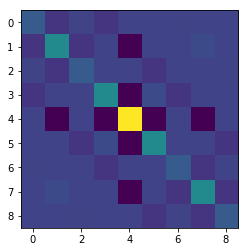

In [21]:
plt.imshow(matrix)

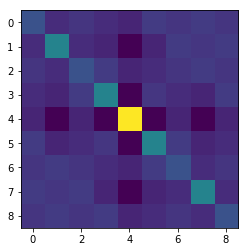

In [22]:
plt.imshow(ref_matrix)